In [1]:
import sys
print(sys.executable)

import numpy as np
from scipy.stats import rankdata, ttest_rel, ttest_1samp
from scipy.stats import zscore

from matplotlib import pyplot as plt
from scipy.stats import linregress
import pickle
import seaborn as sns

import nibabel as nib
subjects =  ['sub-EZ9NM','sub-TV7EF','sub-WLC4O','sub-3L109','sub-3UYSS','sub-JVPPA','sub-EDOP8',
             'sub-TIJD1','sub-AYDLR','sub-98UT7','sub-4G9A5','sub-YJBI8','sub-FG8PD','sub-BBN4K',
             'sub-F61IR','sub-M1ZRL','sub-NZJZN','sub-XZ9SS','sub-L05R3','sub-ZOVPY','sub-6PEOF',
             'sub-G6RPG','sub-TPNCU','sub-9ADGJ','sub-27IXQ','sub-NDX5S','sub-OE7EZ','sub-28E84',
             'sub-ENN9N','sub-28OBV','sub-8WJAP','sub-SPHBN','sub-WP8SX','sub-BG4CW','sub-AVQEZ',
             'sub-YLWD1','sub-0A4MV','sub-8PIML','sub-4T7NM','sub-X5RE0','sub-RUQON','sub-JVT46',
             'sub-RTFX9','sub-OWWAF','sub-IC2KG','sub-S3I4J','sub-XFQA1','sub-UKF5L','sub-Z0MJJ',
             'sub-9HMVR','sub-DBQ8H','sub-NAD3W','sub-KH33B','sub-JASQ6','sub-T6FHZ','sub-PQ8JD',
             'sub-NOVID','sub-XAKBX','sub-JVSIQ','sub-D1FKN','sub-R3JA3','sub-GPMCX','sub-H8QL5',
             'sub-6HW3V','sub-WF939']

Hippocampus_mask = np.load('data/Hippocampus_mask.npy')
PMC_mask = np.load('data/PMC_mask.npy')
VMPFC_mask = np.load('data/VMPFC_mask.npy')
AG_mask = np.load('data/AG_mask.npy')

save = True
if save:
    Hippocampus_patterns = np.zeros((len(subjects), 610, int(np.sum(Hippocampus_mask))))
    PMC_patterns = np.zeros((len(subjects), 610, int(np.sum(PMC_mask))))
    VMPFC_patterns = np.zeros((len(subjects), 610, int(np.sum(VMPFC_mask))))
    AG_patterns = np.zeros((len(subjects), 610, int(np.sum(AG_mask))))
    for i, subject in enumerate(subjects):
        print(subject)
        path = f'/DATA/FilmMemory_preprocess/mrbean_scrambled/{subject}_scrambled_smoothing_scale.nii.gz'
        fmri_data = nib.load(path).get_fdata()

        for m, mask in enumerate([Hippocampus_mask, VMPFC_mask, PMC_mask, AG_mask]):
            roi_patterns = zscore(fmri_data[mask==1, :].T, axis=0)
            roi_patterns = np.nan_to_num(roi_patterns)
            if m == 0:
                Hippocampus_patterns[i,:,:] = roi_patterns
            elif m == 1:
                VMPFC_patterns[i,:,:] = roi_patterns
            elif m == 2:
                PMC_patterns[i,:,:] = roi_patterns
            elif m == 3:
                AG_patterns[i,:,:] = roi_patterns

    np.save(f'data/Hippocampus_patterns.npy', Hippocampus_patterns)
    np.save(f'data/VMPFC_patterns.npy', VMPFC_patterns)
    np.save(f'data/PMC_patterns.npy', PMC_patterns)
    np.save(f'data/AG_patterns.npy', AG_patterns)
else:
    Hippocampus_patterns = np.load(f'data/Hippocampus_patterns.npy')
    VMPFC_patterns = np.load(f'data/VMPFC_patterns.npy')
    PMC_patterns = np.load(f'data/PMC_patterns.npy')
    AG_patterns = np.load(f'data/AG_patterns.npy')

print(Hippocampus_patterns.shape)
print(PMC_patterns.shape)
print(VMPFC_patterns.shape)
print(AG_patterns.shape)

/home/jwpark/anaconda3/envs/NarrativePuzzle/bin/python3.10
sub-001
sub-002
sub-003
sub-004
sub-005
sub-006
sub-013
sub-014
sub-015
sub-016
sub-017
sub-018
sub-019
sub-020
sub-021
sub-022
sub-023
sub-024
sub-025
sub-026
sub-027
sub-028
sub-029
sub-030
sub-031
sub-032
sub-033
sub-034
sub-035
sub-038
sub-039
sub-040
sub-042
sub-043
sub-044
sub-049
sub-050
sub-057
sub-058
sub-059
sub-060
sub-061
sub-062
sub-063
sub-064
sub-072
sub-075
sub-078
sub-082
sub-083
sub-086
sub-087
sub-089
sub-090
sub-092
sub-095
sub-096
sub-099
sub-101
sub-103
sub-105
sub-107
sub-109
sub-111
sub-113
(65, 610, 671)
(65, 610, 484)
(65, 610, 449)
(65, 610, 513)


end: paired t-test TtestResult(statistic=5.914503522278775, pvalue=1.4182122929074543e-07, df=64)
end: t-test (related) TtestResult(statistic=5.257383409822726, pvalue=1.796107905742331e-06, df=64)
end: t-test (unrelated) TtestResult(statistic=-4.798223228318374, pvalue=9.968904521736948e-06, df=64)
onset: paired t-test TtestResult(statistic=1.156481190470572, pvalue=0.25178304503272875, df=64)
onset: t-test (related) TtestResult(statistic=2.6043881231098, pvalue=0.011430069343629296, df=64)
onset: t-test (unrelated) TtestResult(statistic=3.5757709147178827, pvalue=0.000671075138901548, df=64)


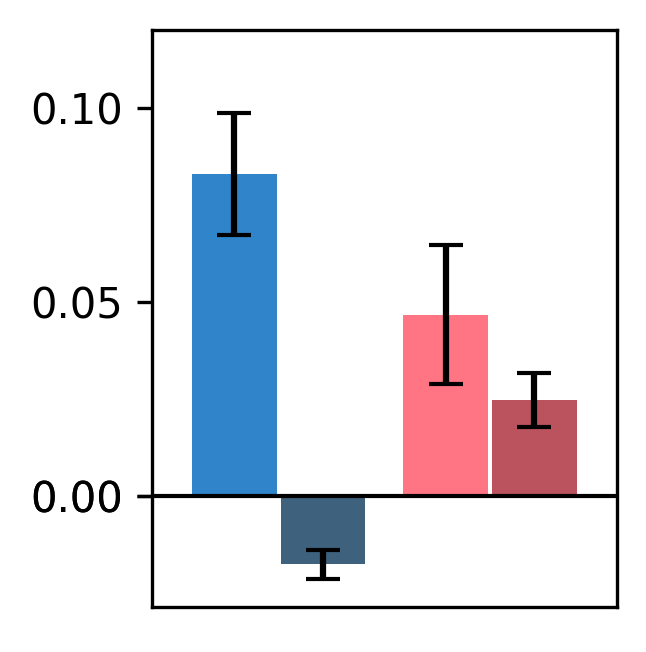

In [12]:
from scipy.spatial.distance import cosine
from scipy.stats import ttest_rel, sem, ttest_1samp
plt.style.use('default')

with open('../utils/movie/backward_retrieval_related.pkl', 'rb') as f:
    backward_retrieval_related = pickle.load(f)
with open('../utils/movie/backward_retrieval_unrelated.pkl', 'rb') as f:
    backward_retrieval_unrelated = pickle.load(f)

with open('../utils/movie/forward_retrieval_related.pkl', 'rb') as f:
    forward_retrieval_related = pickle.load(f)
with open('../utils/movie/forward_retrieval_unrelated.pkl', 'rb') as f:
    forward_retrieval_unrelated = pickle.load(f)

ROI_list = ['Hippocampus', 'VMPFC', 'PMC', 'AG']
backward_retrieval_offsets = [13, 15, 15, 15]
backward_retrieval_durations = [9, 9, 9, 13]
forward_retrieval_offsets = [8, 7, 4, 5]
forward_retrieval_durations = [3, 9, 3, 3]

r = 3
roi = ROI_list[r]
backward_retrieval_related_result = np.zeros((len(subjects), len(backward_retrieval_related)))
backward_retrieval_unrelated_result = np.zeros((len(subjects), len(backward_retrieval_unrelated)))
forward_retrieval_related_result = np.zeros((len(subjects), len(forward_retrieval_related)))
forward_retrieval_unrelated_result = np.zeros((len(subjects), len(forward_retrieval_unrelated)))

for i, subject in enumerate(subjects):
    if roi == 'Hippocampus':
        roi_patterns = Hippocampus_patterns[i,:,:]
    elif roi == 'VMPFC':
        roi_patterns = VMPFC_patterns[i,:,:]
    elif roi == 'PMC':
        roi_patterns = PMC_patterns[i,:,:]
    elif roi == 'AG':
        roi_patterns = AG_patterns[i,:,:]

    backward_offset = backward_retrieval_offsets[r]
    backward_duration = backward_retrieval_durations[r]
    for p, pair in enumerate(backward_retrieval_related):
        prev_patterns = roi_patterns[pair[0]+backward_offset-backward_duration//2:pair[0]+backward_offset-backward_duration//2+backward_duration, :].mean(axis=0)
        next_patterns = roi_patterns[pair[1]-8:pair[1]-2, :].mean(axis=0) # Fixed from activity analysis
        backward_retrieval_related_result[i,p] = 1-cosine(prev_patterns, next_patterns)

    for p, pair in enumerate(backward_retrieval_unrelated):
        prev_patterns = roi_patterns[pair[0]+backward_offset-backward_duration//2:pair[0]+backward_offset-backward_duration//2+backward_duration, :].mean(axis=0)
        next_patterns = roi_patterns[pair[1]-8:pair[1]-2, :].mean(axis=0) # Fixed from activity analysis
        backward_retrieval_unrelated_result[i,p] = 1-cosine(prev_patterns, next_patterns)

    forward_offset = forward_retrieval_offsets[r]
    forward_duration = forward_retrieval_durations[r]
    for p, pair in enumerate(forward_retrieval_related):
        prev_patterns = roi_patterns[pair[0]+forward_offset-forward_duration//2:pair[0]+forward_offset-forward_duration//2+forward_duration, :].mean(axis=0)
        next_patterns = roi_patterns[pair[1]+3:pair[1]+7, :].mean(axis=0) # Fixed from activity analysis
        forward_retrieval_related_result[i,p] = 1-cosine(prev_patterns, next_patterns)

    for p, pair in enumerate(forward_retrieval_unrelated):
        prev_patterns = roi_patterns[pair[0]+forward_offset-forward_duration//2:pair[0]+forward_offset-forward_duration//2+forward_duration, :].mean(axis=0)
        next_patterns = roi_patterns[pair[1]+3:pair[1]+7, :].mean(axis=0) # Fixed from activity analysis
        forward_retrieval_unrelated_result[i,p] = 1-cosine(prev_patterns, next_patterns)

backward_retrieval_related_result = backward_retrieval_related_result.mean(axis=-1)
backward_retrieval_unrelated_result = backward_retrieval_unrelated_result.mean(axis=-1)
forward_retrieval_related_result = forward_retrieval_related_result.mean(axis=-1)
forward_retrieval_unrelated_result = forward_retrieval_unrelated_result.mean(axis=-1)

print("end: paired t-test", ttest_rel(backward_retrieval_related_result, backward_retrieval_unrelated_result))
print("end: t-test (related)", ttest_1samp(backward_retrieval_related_result, popmean=0.0))
print("end: t-test (unrelated)", ttest_1samp(backward_retrieval_unrelated_result, popmean=0.0))

print("onset: paired t-test", ttest_rel(forward_retrieval_related_result, forward_retrieval_unrelated_result))
print("onset: t-test (related)", ttest_1samp(forward_retrieval_related_result, popmean=0.0))
print("onset: t-test (unrelated)", ttest_1samp(forward_retrieval_unrelated_result, popmean=0.0))


backward_related_color = '#3084c9'
backward_unrelated_color = '#3e627e'
forward_related_color = '#ff7583'
forward_unrelated_color = '#ba535e'

plt.figure(figsize=(2.0,2.5), dpi=300)
plt.bar([0-0.21, 0+0.21],
        [backward_retrieval_related_result.mean(), backward_retrieval_unrelated_result.mean()],
        width=0.4,
        yerr=[sem(backward_retrieval_related_result),
              sem(backward_retrieval_unrelated_result)],
        capsize=4, color=[backward_related_color, backward_unrelated_color])
plt.bar([1-0.21, 1+0.21],
        [forward_retrieval_related_result.mean(), forward_retrieval_unrelated_result.mean()],
        width=0.4,
        yerr=[sem(forward_retrieval_related_result),
              sem(forward_retrieval_unrelated_result)],
        capsize=4, color=[forward_related_color, forward_unrelated_color])

plt.axhline(0, c='k', lw=1)
plt.ylim(-0.12*(0.01/0.042),0.12)
plt.xlim(-0.6, 1.6)
plt.yticks([0,0, 0.05, 0.1])
if r == 0:
    plt.xticks([0,1], ["",""])
else:
    plt.xticks([0,1], ["",""])
    plt.gca().tick_params('x', color='w')
plt.show()